Our objective: Find a suitable set of weights and biases using the training data, to make accurate predictions.


The training data can be represented using 2 matrices (inputs and targets), each with one row per observation and one column for variable.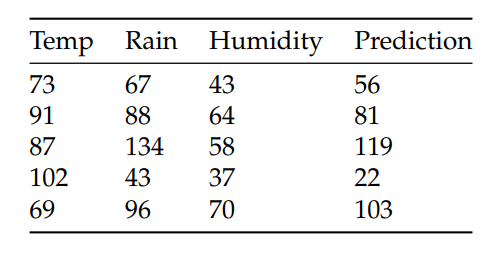

In [33]:
# Import Numpy & PyTorch
import numpy as np
import torch

In [34]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
[91, 88, 64],
[87, 134, 58],
[102, 43, 37],
[69, 96, 70]], dtype='float32')


In [35]:
# Target (apples)
targets = np.array([[56],
[81],
[119],
[22],
[103]], dtype='float32')


In [36]:
# Convert inputs and targets to tensors
# Imports
import torch

In [37]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)


In [38]:
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [39]:
# Weights and biases
w = torch.randn(1,3,requires_grad =True)
print(w)
b = torch.randn(1,requires_grad=True)
print(b)

tensor([[-1.5619,  0.4350,  0.0580]], requires_grad=True)
tensor([1.4016], requires_grad=True)


In [40]:
def model(x):
  return torch.mm(x,w.t(),out=None) +b

In [41]:
# Generate predictions
# Compare with targets

preds = model(inputs)
print("Prediction :",preds)
print("Targets :",targets)

Prediction : tensor([[ -80.9837],
        [ -98.7464],
        [ -72.8381],
        [-137.0675],
        [ -60.5557]], grad_fn=<AddBackward0>)
Targets : tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [42]:
# MSE Loss
def mseLoss(prediction, target):

  difference = 0
  cnt = 0
  sum = 0
  n = len(target)
  for i in range(0,n):
    cnt += 1;
    difference = target[i] - prediction[i]
    sqr = difference * difference
    sum += sqr
  mean = sum/cnt
  return mean


In [43]:
# Compute loss
output = mseLoss(preds,targets)
print("Loss: ",output)

Loss:  tensor([27985.6133], grad_fn=<DivBackward0>)


In [44]:
# Compute gradients
print("Gradient :",output.backward())

Gradient : None


In [45]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[-1.5619,  0.4350,  0.0580]], requires_grad=True)
tensor([[-28222.7480, -29297.2559, -18342.0273]])


In [46]:
# Gradients for bias
print(b)
print(b.grad)

tensor([1.4016], requires_grad=True)
tensor([-332.4765])


In [47]:
# Compute gradients
with torch.no_grad():
  w-=w.grad*1e-5
  b-=b.grad*1e-5
  w.grad.zero_()
  b.grad.zero_()
print(w)
print(b)

tensor([[-1.2797,  0.7279,  0.2414]], requires_grad=True)
tensor([1.4049], requires_grad=True)


In [48]:
# Generate predictions
# Calculate the loss
new_preds = model(inputs)
new_loss = mseLoss(new_preds,targets)
print("New Loss :",new_loss)

New Loss : tensor([11637.3203], grad_fn=<DivBackward0>)


In [49]:
# Train for 100 epochs
for i in range(100):
  preds = model(inputs)
  loss = mseLoss(preds,targets)
  loss.backward()
  with torch.no_grad():
    w-=w.grad * 1e-5
    b-=b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [50]:
# Calculate loss
preds = model(inputs)
loss = mseLoss(preds,targets)
print(loss)

tensor([17.3010], grad_fn=<DivBackward0>)


In [51]:
import torch.nn as nn
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [52]:
def model1(x):
  return x @ w.t() +b

In [53]:
preds = model(inputs)
print("Prediction :",preds)
print("Targets :",targets)

Prediction : tensor([[ 56.3198],
        [ 80.2044],
        [124.6107],
        [ 14.6511],
        [102.4678]], grad_fn=<AddBackward0>)
Targets : tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [54]:
loss = nn.MSELoss()
output = loss(preds,targets)
output.backward()
print("Loss :",output)

Loss : tensor(17.3010, grad_fn=<MseLossBackward0>)


In [55]:
print(w)
print(w.grad)
print(b)
print(b.grad)

tensor([[-0.4954,  0.9961,  0.5659]], requires_grad=True)
tensor([[-138.8906,  134.4646,   -8.3615]])
tensor([1.4130], requires_grad=True)
tensor([-1.0984])


In [56]:
for i in range(100):
    preds = model(inputs)
    loss = mseLoss(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [57]:
preds = model1(inputs)
loss = mseLoss(preds,targets)
 
print(loss)

tensor([3.3367], grad_fn=<DivBackward0>)


#4_1

In [58]:
 # Import Numpy & PyTorch
import numpy as np
import torch

In [59]:
# Imports
import torch.nn as nn

In [60]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37],[69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69,96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96,70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
[56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
[56, 70], [81, 101], [119, 133], [22, 37], [103, 119]],dtype='float32')


In [61]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [62]:
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [63]:
# Import tensor dataset & data loader
from torch.utils.data import TensorDataset, DataLoader

In [64]:
 # Define dataset
train_ds = TensorDataset(inputs,targets)

In [65]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[ 73.,  67.,  43.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 73.,  67.,  43.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [119., 133.],
         [ 22.,  37.],
         [ 56.,  70.],
         [119., 133.]])]

In [66]:
# Define model
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.4468, -0.5706,  0.5196],
        [-0.3816, -0.1370, -0.4666]], requires_grad=True)
Parameter containing:
tensor([-0.2638,  0.2341], requires_grad=True)


In [67]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [68]:
# Define loss function
import torch.nn.functional as F
loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(16796.8633, grad_fn=<MseLossBackward0>)


In [69]:
#definr utility function to train the model
def fit(num_epochs,model,loss_fn,opt):
  for epochs in range(num_epochs):
    for xb,yb in train_dl:
      #generate prediction
      pred = model(xb)
      loss = loss_fn(pred, yb)
      #perform gradient descent
      loss.backward()
      opt.step()
      opt.zero_grad()
  print('Training loss: ', loss_fn(model(inputs), targets))
# Train the model for 100 epochs
fit(100, model, loss_fn, opt)


Training loss:  tensor(42.3049, grad_fn=<MseLossBackward0>)


In [70]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 59.0631,  71.5190],
        [ 84.8036,  96.4131],
        [111.2263, 139.8844],
        [ 31.3221,  43.9464],
        [100.3009, 107.7934],
        [ 59.0631,  71.5190],
        [ 84.8036,  96.4131],
        [111.2263, 139.8844],
        [ 31.3221,  43.9464],
        [100.3009, 107.7934],
        [ 59.0631,  71.5190],
        [ 84.8036,  96.4131],
        [111.2263, 139.8844],
        [ 31.3221,  43.9464],
        [100.3009, 107.7934]], grad_fn=<AddmmBackward0>)

In [71]:
# Compare with targets
print(targets)


tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


#Exercise 1 

Try Linear Regression just using numpy (Without Tensorflow/Pytorch or other torch
library). You can optionally use sklearn (if you want).

In [72]:
import numpy as np
import torch
inputs = np.array([[73,67,43],
                   [91,88,64],
                   [87,134,58],
                   [102,43,37],
                   [69,96,70]],dtype='float32')
targets = np.array([[56],
                    [81],
                    [119],
                    [22],
                    [103]],dtype='float32')
 # Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
print(inputs)
targets = torch.from_numpy(targets)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [73]:
# Weights and biases
w = torch.randn(1,3,requires_grad =True)
print(w)
b = torch.randn(1,requires_grad=True)
print(b)
# Define the model
def model(x):
  return torch.mm(x,w.t(),out=None) +b
# Generate predictions
# Compare with targets

preds = model(inputs)
print("Prediction :",preds)
print("Targets :",targets)
# MSE loss
# Compute loss
def mse(P,T):
  diff = 0
  i=0
  sum=0
  n=len(T)
  for k in range(0,n):
    i+=1
    diff = T[k] - P[k]
    square = diff*diff
    sum+=square
  mean = sum/i
  return mean

output = mse(preds,targets)
print("Loss :",output)
# Compute gradients
print("Gradient :",output.backward())
# Gradients for weights
print(w)
print(w.grad)
# Gradients for bias
print(b)
print(b.grad)
# Compute gradients
with torch.no_grad():
  w-=w.grad*1e-5
  b-=b.grad*1e-5
  w.grad.zero_()
  b.grad.zero_()
print(w)
print(b)
# Generate predictions
# Calculate the loss
new_preds = model(inputs)
new_loss = mse(new_preds,targets)
print("New Loss :",new_loss)
# Train for 100 epochs
for i in range(100):
  preds = model(inputs)
  loss = mse(preds,targets)
  loss.backward()
  with torch.no_grad():
    w-=w.grad * 1e-5
    b-=b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()
# Calculate loss
preds = model(inputs)
loss = mse(preds,targets)
print(loss)

tensor([[ 1.6099,  1.2060, -0.8894]], requires_grad=True)
tensor([-0.4981], requires_grad=True)
Prediction : tensor([[159.5813],
        [195.2080],
        [249.5819],
        [182.6590],
        [164.1030]], grad_fn=<AddBackward0>)
Targets : tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])
Loss : tensor([14073.8184], grad_fn=<DivBackward0>)
Gradient : None
tensor([[ 1.6099,  1.2060, -0.8894]], requires_grad=True)
tensor([[19967.3281, 18904.9824, 11823.4609]])
tensor([-0.4981], requires_grad=True)
tensor([228.0533])
tensor([[ 1.4102,  1.0170, -1.0076]], requires_grad=True)
tensor([-0.5004], requires_grad=True)
New Loss : tensor([6713.3374], grad_fn=<DivBackward0>)
tensor([351.1718], grad_fn=<DivBackward0>)


#Exercise 2:

Try Linear regression on same prediction data using Tensorflow.

In [74]:
 # Imports
import torch.nn as nn
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [75]:
def model1(x):
  return x @ w.t() +b
preds = model(inputs)
print("Prediction :",preds)
print("Targets :",targets)
loss = nn.MSELoss()
output = loss(preds,targets)
output.backward()
print("Loss :",output)
print(w)
print(w.grad)
print(b)
print(b.grad)
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()
preds = model1(inputs)
loss = mse(preds,targets)
 
print(loss)

Prediction : tensor([[ 61.4658],
        [ 73.3114],
        [132.0087],
        [ 45.3829],
        [ 72.1636]], grad_fn=<AddBackward0>)
Targets : tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])
Loss : tensor(351.1718, grad_fn=<MseLossBackward0>)
tensor([[ 0.2545,  1.1883, -0.8424]], requires_grad=True)
tensor([[ 435.3745, -208.8237, -318.3683]])
tensor([-0.5083], requires_grad=True)
tensor([1.3329])
tensor([183.5751], grad_fn=<DivBackward0>)
